In [4]:
!pip install sklearn
!pip install seaborn

Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python3.7 -m pip install --upgrade pip' command.
Looking in indexes: http://repo.myhuaweicloud.com/repository/pypi/simple
     |████████████████████████████████| 292 kB 20.4 MB/s eta 0:00:01
You should consider upgrading via the '/home/ma-user/anaconda3/envs/python-3.7.10/bin/python3.7 -m pip install --upgrade pip' command.


In [5]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn.datasets as datasets
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sb
import pandas as pd

In [6]:
def sigmoid(x):
    """ Sigmoid function
    Args:
        x: input of sigmoid function
    Returns:
        Result of sigmoid function
    """
    return 1.0 / (1 + np.exp(-x))

In [7]:
class Logistic:
    """ Logistic Regression Function
    Attributes:
        lr: learning rate
        epoch: number of iterations
        class_num: number of classes
    """
    def __init__(self, lr=0.001, epoch=500):
        """Init logistic regression function"""
        self.learning_rate = lr
        self.epoch = epoch
        self.class_num = 2

    def loss(self, x, y, weights):
        """ Loss function
        Args:
            x: input x data
            y: input y label result
            weights: weights of logistic regression
        Returns:
            Loss value
        """
        weights = np.matrix(weights)
        loss = np.sum(
            np.multiply(y, np.log(sigmoid(x * weights))) + np.multiply(1 - y, np.log(1 - sigmoid(x * weights)))) / (
                   -len(x))
        return loss

    def grad(self, x, y, weights):
        """ Gradient descent function
        Args:
            x: input x data
            y: input y label result
            weights: weights of logistic regression
        Returns:
            Updated weights
            loss record
        """
        x = np.matrix(x)
        y = np.matrix(y)
        weights = np.matrix(weights)
        cost_lst = []
        for i in range(self.epoch + 1):
            h = sigmoid(x * weights)
            error = (h - y)
            gradient = x.T * error / (x.shape[0])
            weights -= self.learning_rate * gradient
            if i % 50 == 0:
                cost_lst.append(self.loss(x, y, weights))
        return weights, cost_lst

    def train(self, inX, iny, plot=False):
        """Train Logistic Regression with data
        Args:
            inX: input data matrix
            iny: input label matrix
            plot: plot loss curve or not
        Returns:
            weights
        """
        self.class_num = len(set(iny.flatten()))
        m, n = np.shape(inX)
        if self.class_num == 2:
            iny = np.reshape(iny, (m, 1))
            weights = np.ones((n, 1))
            weights, cost_lst = self.grad(inX, iny, weights)
            if plot:
                a = np.linspace(0, self.epoch, self.epoch // 50 + 1)
                plt.plot(a, cost_lst, c='y')
                plt.xlabel('epoch')
                plt.ylabel('loss')
                title = 'Training Loss'
                plt.title(title)
                plt.show()
            return weights

        else:
            inX = np.concatenate((np.ones((len(inX), 1)), inX), axis=1)
            m, n = np.shape(inX)
            weights_box = []
            labels = [item for item in set(iny.flatten())]
            for i in range(self.class_num):
                weights = np.ones((n, 1))
                temp_y = []
                for j in range(len(iny)):
                    if iny[j] == labels[i]:
                        temp_y.append([1])
                    else:
                        temp_y.append([0])
                weights, cost_lst = self.grad(inX, temp_y, weights)
                if plot:
                    a = np.linspace(0, self.epoch, self.epoch // 50 + 1)
                    plt.plot(a, cost_lst, c='y')
                    plt.xlabel('epoch')
                    plt.ylabel('loss')
                    title = 'Training Loss for Iris ' + str(i)
                    plt.title(title)
                    plt.show()
                weights_box.append(weights)

            return weights_box

    def predict(self, inX, iny, weights):
        """Predict label with trained weights
        Args:
            inX: input data matrix
            iny: input label matrix
            weights: trained weights
        Returned plot of confusion matrix,
        print classification report and accuracy score
        """
        if self.class_num == 2:
            m, n = np.shape(inX)
            h = sigmoid(inX * weights)
            for i in range(len(h)):
                if h[i] >= 0.5:
                    h[i] = 1
                else:
                    h[i] = 0

            confusion_matrix_res = confusion_matrix(iny, h)
            plt.figure()
            sb.heatmap(confusion_matrix_res, annot=True, cmap='Blues')
            plt.xlabel('predicted labels')
            plt.ylabel('True labels')
            plt.show()
            print("======================= Classification Report =========================")
            print(classification_report(iny, h))
            print("=======================================================================")
            print('Accuracy Score is: {:.3f}'.format(accuracy_score(iny, h)))

        elif self.class_num > 2:
            inX = np.concatenate((np.ones((len(inX), 1)), inX), axis=1)
            predict_box = []
            predict_y = []
            for i in range(self.class_num):
                predict_box.append(sigmoid(inX * weights[i]))
            if self.class_num == 3:
                for i in range(len(inX)):
                    if max([item[i] for item in predict_box]) == predict_box[0][i]:
                        predict_y.append([0])
                    elif max([item[i] for item in predict_box]) == predict_box[1][i]:
                        predict_y.append([1])
                    else:
                        predict_y.append([2])
                print('Predict Result: ')
                for i in range(len(inX)):
                    print('Iris No.', str(i), '  --->  ', predict_y[i])
                confusion_matrix_res = confusion_matrix(iny, predict_y)
                plt.figure()
                sb.heatmap(confusion_matrix_res, annot=True, cmap='Blues')
                plt.xlabel('predicted labels')
                plt.ylabel('True labels')
                plt.show()
                print("======================= Classification Report =========================")
                print(classification_report(iny, predict_y))
                print("=======================================================================")
                print('Accuracy Score is: {:.3f}'.format(accuracy_score(iny, predict_y)))


In [8]:
# Load dataset
def load_dataset(data='melon'):
    """ Load dataset
    Args:
        data: 'iris' or 'melon'
    Returns:
        dataMatrix: data matrix
        labelMatrix: label matrix
        file: datasets file
    """
    dataMatrix = None
    labelMatrix = None
    file = None
    if data == 'melon':
        file = open(r'melon3_dataset.txt')
        dataMat = []
        labelMat = []
        for line in file.readlines():
            lineArr = line.strip().split()
            dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
            labelMat.append(int(lineArr[2]))
            dataMatrix = np.matrix(dataMat)
            labelMatrix = np.array(labelMat)
    elif data == 'iris':
        file = datasets.load_iris()
        dataMatrix = file.data
        labelMatrix = file.target
    return dataMatrix, labelMatrix, file

In [9]:
def plot_iris(data):
    """Plot Iris dataset
    Args:
        data: dataset
    Plot Iris dataset distribution
    """
    iris_data = pd.DataFrame(data=data.data, columns=data.feature_names)
    iris_data['target'] = data.target
    sb.pairplot(data=iris_data, diag_kind='hist', hue='target', palette='Paired')
    plt.show()
    for col in iris_data:
        if col != 'target':
            sb.boxplot(x='target', y=col, palette='Paired', data=iris_data)
            plt.title(col)
            plt.show()
        else:
            pass

In [10]:
def plot_melon(inX, iny, weights):
    """Plot Melon dataset
    Args:
        inX: input data matrix
        iny: input label matrix
        weights: trained weights
    Plot Logistic Regression Results on Melon3 Dataset
    """
    iny = np.squeeze(iny)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    n = np.shape(inX)[0]
    for i in range(n):
        if iny[i] == 1:
            ax.scatter(inX[i, 1], inX[i, 2], c='r')
        else:
            ax.scatter(inX[i, 1], inX[i, 2], c='b')
    x = np.arange(0, 1, 0.01)
    y = (-weights.A[0][0] - weights.A[1][0] * x) / weights.A[2][0]
    ax.plot(x, y)
    plt.xlim(0, 1)
    plt.ylim(0, 0.5)
    plt.title('Melon Dataset - Logistic Regression')
    plt.xlabel('Density')
    plt.ylabel('Sugar Content')
    plt.show()

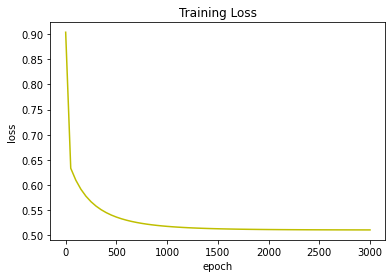

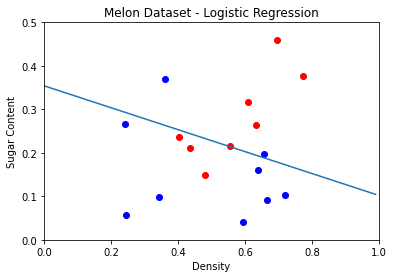

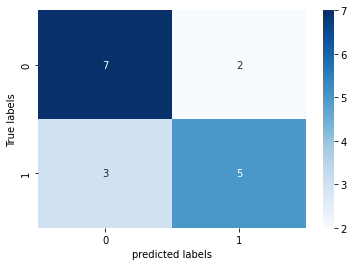

======================= Classification Report =========================
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.71      0.62      0.67         8

    accuracy                           0.71        17
   macro avg       0.71      0.70      0.70        17
weighted avg       0.71      0.71      0.70        17

Accuracy Score is: 0.706


In [13]:
'''Logistic Regression on Melon3 Dataset'''
melon_lr = Logistic(epoch=3000, lr=0.8)
inX, iny, _ = load_dataset(data='melon')
weights = melon_lr.train(inX, iny, plot=True)
plot_melon(inX, iny, weights)
melon_lr.predict(inX, iny, weights)

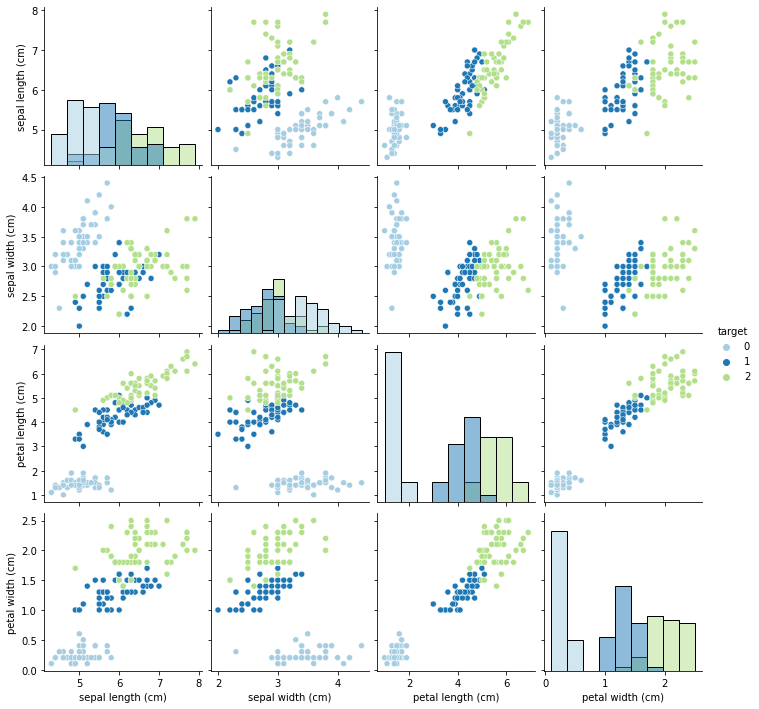

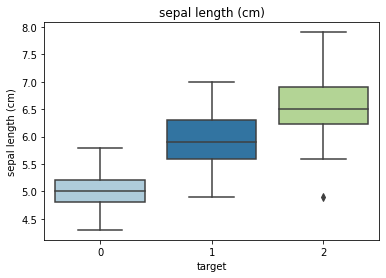

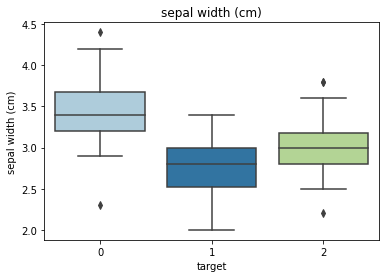

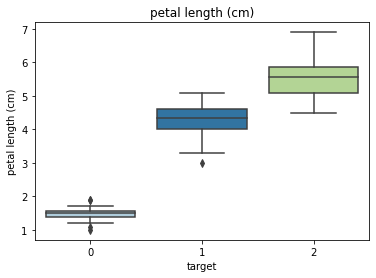

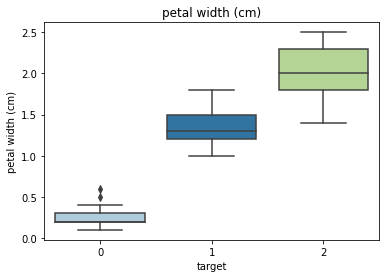

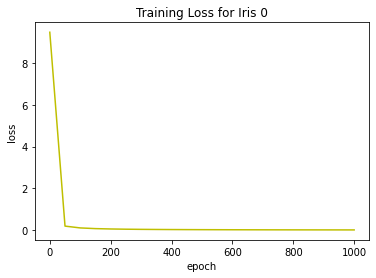

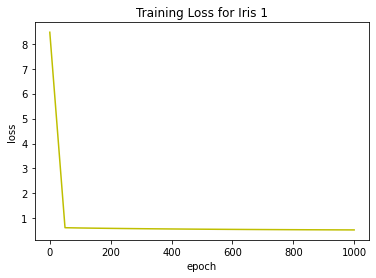

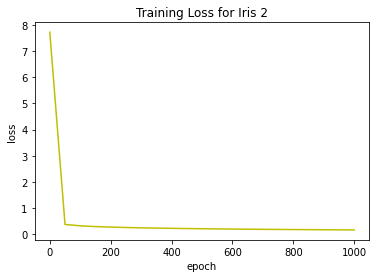

Predict Result: 
Iris No. 0   --->   [0]
Iris No. 1   --->   [0]
Iris No. 2   --->   [0]
Iris No. 3   --->   [0]
Iris No. 4   --->   [0]
Iris No. 5   --->   [0]
Iris No. 6   --->   [0]
Iris No. 7   --->   [0]
Iris No. 8   --->   [0]
Iris No. 9   --->   [0]
Iris No. 10   --->   [0]
Iris No. 11   --->   [0]
Iris No. 12   --->   [0]
Iris No. 13   --->   [0]
Iris No. 14   --->   [0]
Iris No. 15   --->   [0]
Iris No. 16   --->   [0]
Iris No. 17   --->   [0]
Iris No. 18   --->   [0]
Iris No. 19   --->   [0]
Iris No. 20   --->   [0]
Iris No. 21   --->   [0]
Iris No. 22   --->   [0]
Iris No. 23   --->   [0]
Iris No. 24   --->   [0]
Iris No. 25   --->   [0]
Iris No. 26   --->   [0]
Iris No. 27   --->   [0]
Iris No. 28   --->   [0]
Iris No. 29   --->   [0]
Iris No. 30   --->   [0]
Iris No. 31   --->   [0]
Iris No. 32   --->   [0]
Iris No. 33   --->   [0]
Iris No. 34   --->   [0]
Iris No. 35   --->   [0]
Iris No. 36   --->   [0]
Iris No. 37   --->   [0]
Iris No. 38   --->   [0]
Iris No. 39   --->

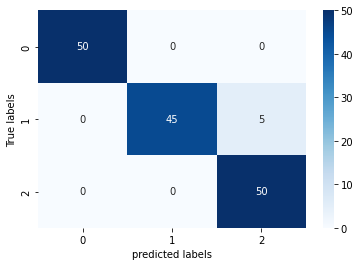

======================= Classification Report =========================
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      0.90      0.95        50
           2       0.91      1.00      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Accuracy Score is: 0.967


In [14]:
'''Logistic Regression on Iris Dataset'''
x, y, data = load_dataset('iris')
plot_iris(data)
iris_lr = Logistic(epoch=1000, lr=0.05)
weights = iris_lr.train(inX=x, iny=y, plot=True)
iris_lr.predict(x, y, weights)